In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


In [10]:
from tensorflow.keras.layers import Dense, Flatten
# 2️⃣ Freeze base model layers
# -------------------------
for layer in base_model.layers:
    layer.trainable = False


In [11]:
# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(units=7, activation='softmax')(x) 

In [12]:
model = Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [13]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# -------------------------
# Paths to your data
train_dir = r'C:\Users\Lenovo\Desktop\python\face_data\train'
val_dir =   r'C:\Users\Lenovo\Desktop\python\face_data\train' 

In [15]:

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print("Class indices:", train_generator.class_indices)


Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.
Class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


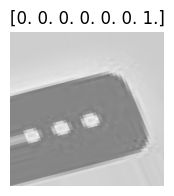

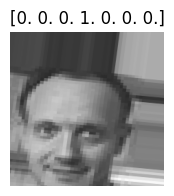

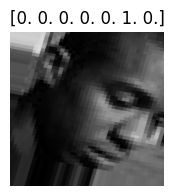

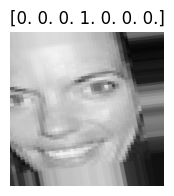

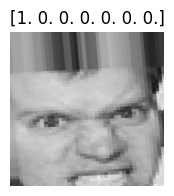

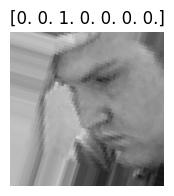

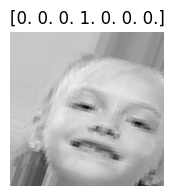

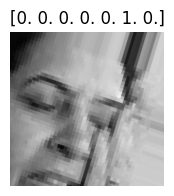

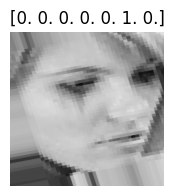

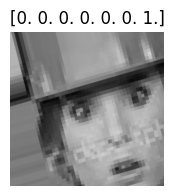

In [16]:
# -------------------------
# 3️⃣ Visualize some images
# -------------------------
def plot_images(images_arr, labels, max_images=10):
    for i, (img, lbl) in enumerate(zip(images_arr, labels)):
        if i >= max_images:
            break
        plt.figure(figsize=(2, 2))
        plt.imshow(img)
        plt.axis('off')
        plt.title(str(lbl))
        plt.show()
images_batch, labels_batch = next(train_generator)
plot_images(images_batch, labels_batch)

In [19]:
# 4️⃣ Callbacks
# -------------------------
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001, verbose=1, mode='auto')
model_checkpoint = ModelCheckpoint(filepath=r"C:\Users\Lenovo\Desktop\python\best_model.h5",
                                   monitor='val_accuracy', save_best_only=True, verbose=1, mode='auto')

callbacks_list = [early_stopping, model_checkpoint]

# --------------------

In [20]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,            
    steps_per_epoch=50,  
    validation_steps=10, 
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.2390 - loss: 13.0644
Epoch 1: val_accuracy improved from None to 0.41250, saving model to C:\Users\Lenovo\Desktop\python\best_model.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 483s 9s/step - accuracy: 0.2612 - loss: 10.1657 - val_accuracy: 0.4125 - val_loss: 7.2437
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3357 - loss: 6.1467
Epoch 2: val_accuracy improved from 0.41250 to 0.44688, saving model to C:\Users\Lenovo\Desktop\python\best_model.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 513s 10s/step - accuracy: 0.3369 - loss: 5.8469 - val_accuracy: 0.4469 - val_loss: 5.2421
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3533 - loss: 5.4668
Epoch 3: val_accuracy did not improve from 0.44688
50/50 ━━━━━━━━━━━━━━━━━━━━ 488s 10s/step - accuracy: 0.3450 - loss: 6.0551 - val_accuracy: 0.3281 - val_loss: 8.3136
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3186 - loss: 8.1418
Epoch 4: val_accuracy did not improve from 0.44688
50/50 ━━━━━━━━━━━━━━━━━━━━ 430s 9s/step - accuracy: 0.3160 - loss: 8.2585 - val_accuracy: 0.3406 - val_loss: 8.4352
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3382 - loss: 7.5627
Epoch 5: val_accuracy improved from 0.44688 to 0.47500, saving model to C:\Users\Lenovo\Desktop\python\best_model.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 407s 8s/step - accuracy: 0.3475 - loss: 7.7609 - val_accuracy: 0.4750 - val_loss: 8.5855


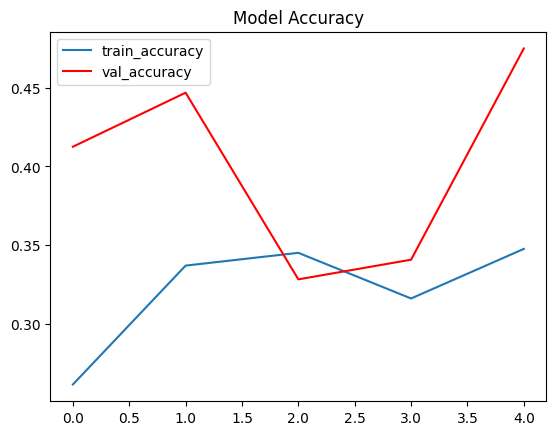

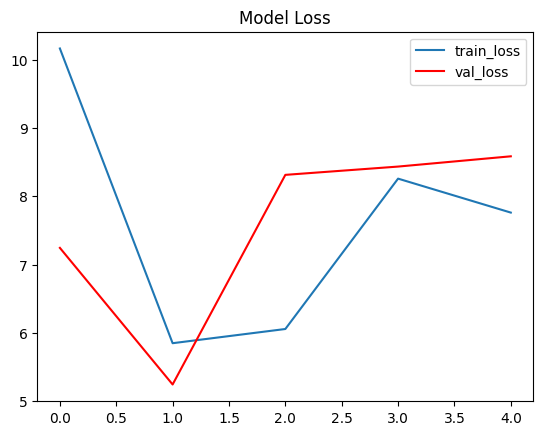

In [21]:
# -------------------------
# 6️⃣ Load best model
# -------------------------
model = load_model(r"C:\Users\Lenovo\Desktop\python\best_model.h5")

# -------------------------
# 7️⃣ Plot training results
# -------------------------
h = history.history

# Accuracy
plt.plot(h['accuracy'], label='train_accuracy')
plt.plot(h['val_accuracy'], label='val_accuracy', c='red')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(h['loss'], label='train_loss')
plt.plot(h['val_loss'], label='val_loss', c='red')
plt.title('Model Loss')
plt.legend()
plt.show()


✅ Downloaded test image to: C:\Users\Lenovo\Desktop\python\happy_test.jpg
✅ Image loaded successfully! Shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted emotion: angry


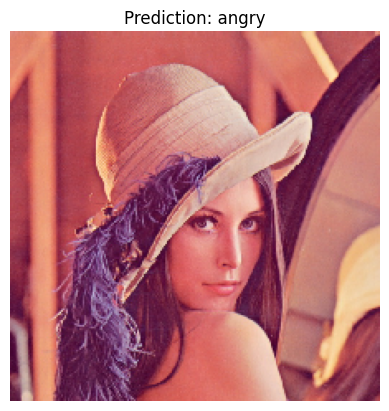

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import requests
from PIL import Image
from io import BytesIO

# -------------------------
# 1️⃣ Load model
# -------------------------
model = load_model(r"C:\Users\Lenovo\Desktop\python\best_model.h5")

# -------------------------
# 2️⃣ Class names
# -------------------------
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# -------------------------
# 3️⃣ Load test image (valid URL)
# -------------------------
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
save_path = r"C:\Users\Lenovo\Desktop\python\happy_test.jpg"

response = requests.get(url)
with open(save_path, "wb") as f:
    f.write(response.content)

print("✅ Downloaded test image to:", save_path)

# -------------------------
# 3️⃣ Load test image (correct size)
# -------------------------
img = image.load_img(save_path, target_size=(224, 224))  # ✅ must be 224x224
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

print("✅ Image loaded successfully! Shape:", img_array.shape)


# -------------------------
# 4️⃣ Predict
# -------------------------
# 4️⃣ Predict
# -------------------------
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
predicted_label = class_names[predicted_class]

print("Predicted emotion:", predicted_label)


# -------------------------
# 5️⃣ Show image with label
# -------------------------
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label}")
plt.show()
